# PP2 - Parte 2

## Notebook do exercício prático 2, Parte 2

* **UEA - Universidade do Estado do Amazonas**
* **EST - Escola Superior de Tecnologia**
* **Matéria de Redes Neurais**
* **Professora Elloá Guedes**
* **Repositório:** https://github.com/levidasilvalima/RNA-PP2

### Autores
* Ian Gustavo Alves Pessoa Silva - 1715080288  
* William Azevedo da Silva - 1615080226  
* Daniel Akio Chen - 1715080253  
* Levi da Silva Lima - 1615080131

## Import das bibliotecas
Aqui há apenas um simples import das bibliotecas a serem usadas

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from google.colab import drive

## Montar o drive
Para caso esteja usando o Google Colab. caso contrário, comentar essa seção.  

In [3]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Import do arquivo a ser usado
Como o próprio nome diz, é import dos dados brutos a serem usados.  
O primeiro desses imports é para o local (usando jupter), o outro é para o Google Colab.
Comentar aquele que não está sendo usado.


In [4]:
# dados_brutos = np.fromfile('./data2.txt') # import direto do arquivo atraves do jupter
dados_brutos = np.fromfile('/content/drive/My Drive/Colab Notebooks/data2.txt') # import do arquivo usando o google drive em conjunto com o google colab

## Organização dos dados
Como os dados estão em um vetor único gigante, devemos remoldá-lo para podermos manipulá-lo.  
Usando o ***reshape*** e o ***transpose***, os dados foram reconstruídos para que o x, y e resultado caibam em vetores diferentes.  
  
Aqui, temos:
* `Vetor1`: Contém elementos X da tupla (X, Y, Z).
* `Vetor2`: Contém elementos Y da tupla (X, Y, Z).
* `Vetor_resposta`: Contém elementos ***Resposta*** da tupla (X, Y, Z).
* `x0`: É um termo único adicionado, descrito no modelo de neurônio perceptron de Rosenblatt.

In [5]:
dados = dados_brutos.reshape((600,3))
dados = dados.transpose()

vetor1 = np.array(dados[0])
vetor2 = np.array(dados[1])
vetor_resposta = np.array(dados[2])
x0 = -1

## Inicialização das configurações a serem usadas
Diferentemente da parte 1, aqui há 9 configurações diferentes a serem geradas obedecendo o produto cartesiano entre os vetores *numpy* (`pes` e `aleatorio`). sendo assim o resultado desse produto e armazenado na variavel `configuracoes` e o mesmo é exibido na execução dessa célula.

In [12]:
# Distribuição uniforme aleatório dos pesos,
# Produto cartesiano a ser feito
pes = np.array([0.4, 0.1, 0.01])
aleatorio = np.array([[-100,100], [-1, 1], [-0.5, 0.5]])

# Vetores vazios que serão adicionados
configuracoes = np.array([]).reshape(0, 2)
vetor_peso = np.empty([9, 3])

for i in range(3):
  for j in range(3):
    config = aleatorio[i] * pes[j] # Produto cartesiano

    # Adicionar ao vetor de configurações possíveis
    configuracoes = np.vstack((configuracoes, config))

print("Possíveis configurações:")
for i in configuracoes:
  print("[{}, {}]".format(round(i[0], 4), round(i[1], 4)))

Possíveis configurações:
[-40.0, 40.0]
[-10.0, 10.0]
[-1.0, 1.0]
[-0.4, 0.4]
[-0.1, 0.1]
[-0.01, 0.01]
[-0.2, 0.2]
[-0.05, 0.05]
[-0.005, 0.005]


## Função de ativação
Aqui temos a função de ativação que será usada para validar as respostas do aprendizado.  
A função usada foi a função de ativação degrau, com v = 0, Ou seja, quando a entrada é 0 ou maior, sua saída é 1, caso contrário é 0.

In [14]:
#Função de ativação tipo degrau, com v = 0
def funcao_ativacao(saida):
  if saida >= 0:
    return 1
  else:
    return 0

## Principal - Aprendizado
Aqui temos a parte principal desta parte 2, o código de aprendizagem dos pesos.  
O código irá ser executado 100 vezes para cada uma das 9 configurações obtidas anteriormente e verificará a função de ativação e a resposta final, ajustando os pesos quando necessário.  
Além disso, o código irá contar quantas vezes os pesos foram ajustados e o número total de épocas também para cada uma das configurações.  
Ao terminar todas as execuções, o código mostrará uma menssagem de termino da sua execução

Nós temos:  
* `n`: A taxa de Aprendizado.  
* `epoca`: Um ciclo de aprendizagem, um ciclo acaba quando todos os pesos visitados 1 vez(modificado ou não).  
* `mudanca_peso`: Quantas vezes o peso foi ajustado em uma época na execução de uma determinada configuração.  
* `mudanca_total`: Quantas vezes, ao total, o peso foi ajustado na execução de uma determinada configuração.  
* `vetor_epoca`: Guarda todas as quantidades de épocas de acordo com sua configuração executada.
* `vetor_mudanca_peso`: Guarda todas as quantidades de mudança no vetor de pesos de acordo com sua configuração executada.
* `fa`: Valor da função de ativação

Para parar a execução, o código verificará todo final de época se houve convergência e assim passará para a proxima execução ate chegar em 100.  
Para convergir, o vetor das funções de ativação deve ser igual ao vetor resultado
~~~python
if((vetor_resposta == vetor_final).all()) # verificação da condição de convergência
~~~

In [21]:
res_temp = 0                                                                      # Int temporário que vai guardar o res para funcao de ativacao
vetor_final = np.empty(600)                                                       # Vetor que será comparado com o resultado

n = 0.1                                                                           # Taxa de aprendizado
mudanca_peso = 0                                                                  # N de ajustes de peso
mudanca_total = 0                                                                 # N total de ajustes de peso
epoca = 0                                                                         # Epocas de ajuste

vetor_epoca = np.zeros([9, 100], dtype=int)                                       # Vetor das epocas
vetor_mudanca_peso = np.zeros([9, 100], dtype=int)                                # Vetor dos ajustes totais

fa = 0                                                                            # Funcao de ativacao

for possibilidades in range(len(configuracoes)):                                  # No caso do pp2, vai repetir 9 vezes
    for instancia in range(100):                                                  # Repetir 100 vezes para gerar dados

        vetor_peso[possibilidades] = np.random.uniform(
            configuracoes[possibilidades][0], 
            configuracoes[possibilidades][1], 3) 
        
        while(True):                                                              # Ele só para quando o vetor de respostas for igual ao vetor final
            for i in range(len(dados[0])):                                        # Repetir pela quantidade de vezes que tiver nos dados
                                                                                  # Soma dos produtos
                vetor_res_temp = (x0 * vetor_peso[possibilidades][0]) + \
                (vetor1[i] * vetor_peso[possibilidades][1]) + \
                (vetor2[i] * vetor_peso[possibilidades][2])

                fa = funcao_ativacao(vetor_res_temp)                              # funcao de ativacao
                vetor_final[i] = fa

                if (fa != vetor_resposta[i]):                                     # Se estiver errado
                    erro = vetor_resposta[i] - fa                                 # Erro é (esperado - funcao ativacao)
                    valor_anterior = np.array([x0, vetor1[i], vetor2[i]])
                                                                                  # Ajuste de peso
                    vetor_peso[possibilidades] = vetor_peso[possibilidades] + \
                    (n*erro*valor_anterior)
                                                                                  # Adicionar quantidade de mudanças totais
                    vetor_mudanca_peso[possibilidades][instancia] += 1
                                                                                  # Adicionar quantas epocas houveram
            vetor_epoca[possibilidades][instancia] += 1

            if((vetor_resposta == vetor_final).all()):
                break

print("ACABOU!")

ACABOU!


## Plot do gráfico
Dada a execução da celular anterior será possível obter todos os valores relacionados às somas da quantidades de epocas e quantidades de mudanças nos pesos para cada uma das 9 configurações. A partir disso é feito a geração da reta que divide a amostra em duas classes diferentes e assim é plotada no grafico abaixo correspondendo um grafico para cada configuração, resultando assim em 9 graficos com sua respectiva reta de divisão.
Nós temos:
* `pontosAzul`: Apenas os pontos da amostra que possuem o valor 1.
* `pontosVermelho`: Apenas os pontos da amostra que possuem o valor 0.
* `x`: Intervalo de pontos do eixo x que sera exibido no gráfico.
* `y`: Função da reta que divide a amostra.

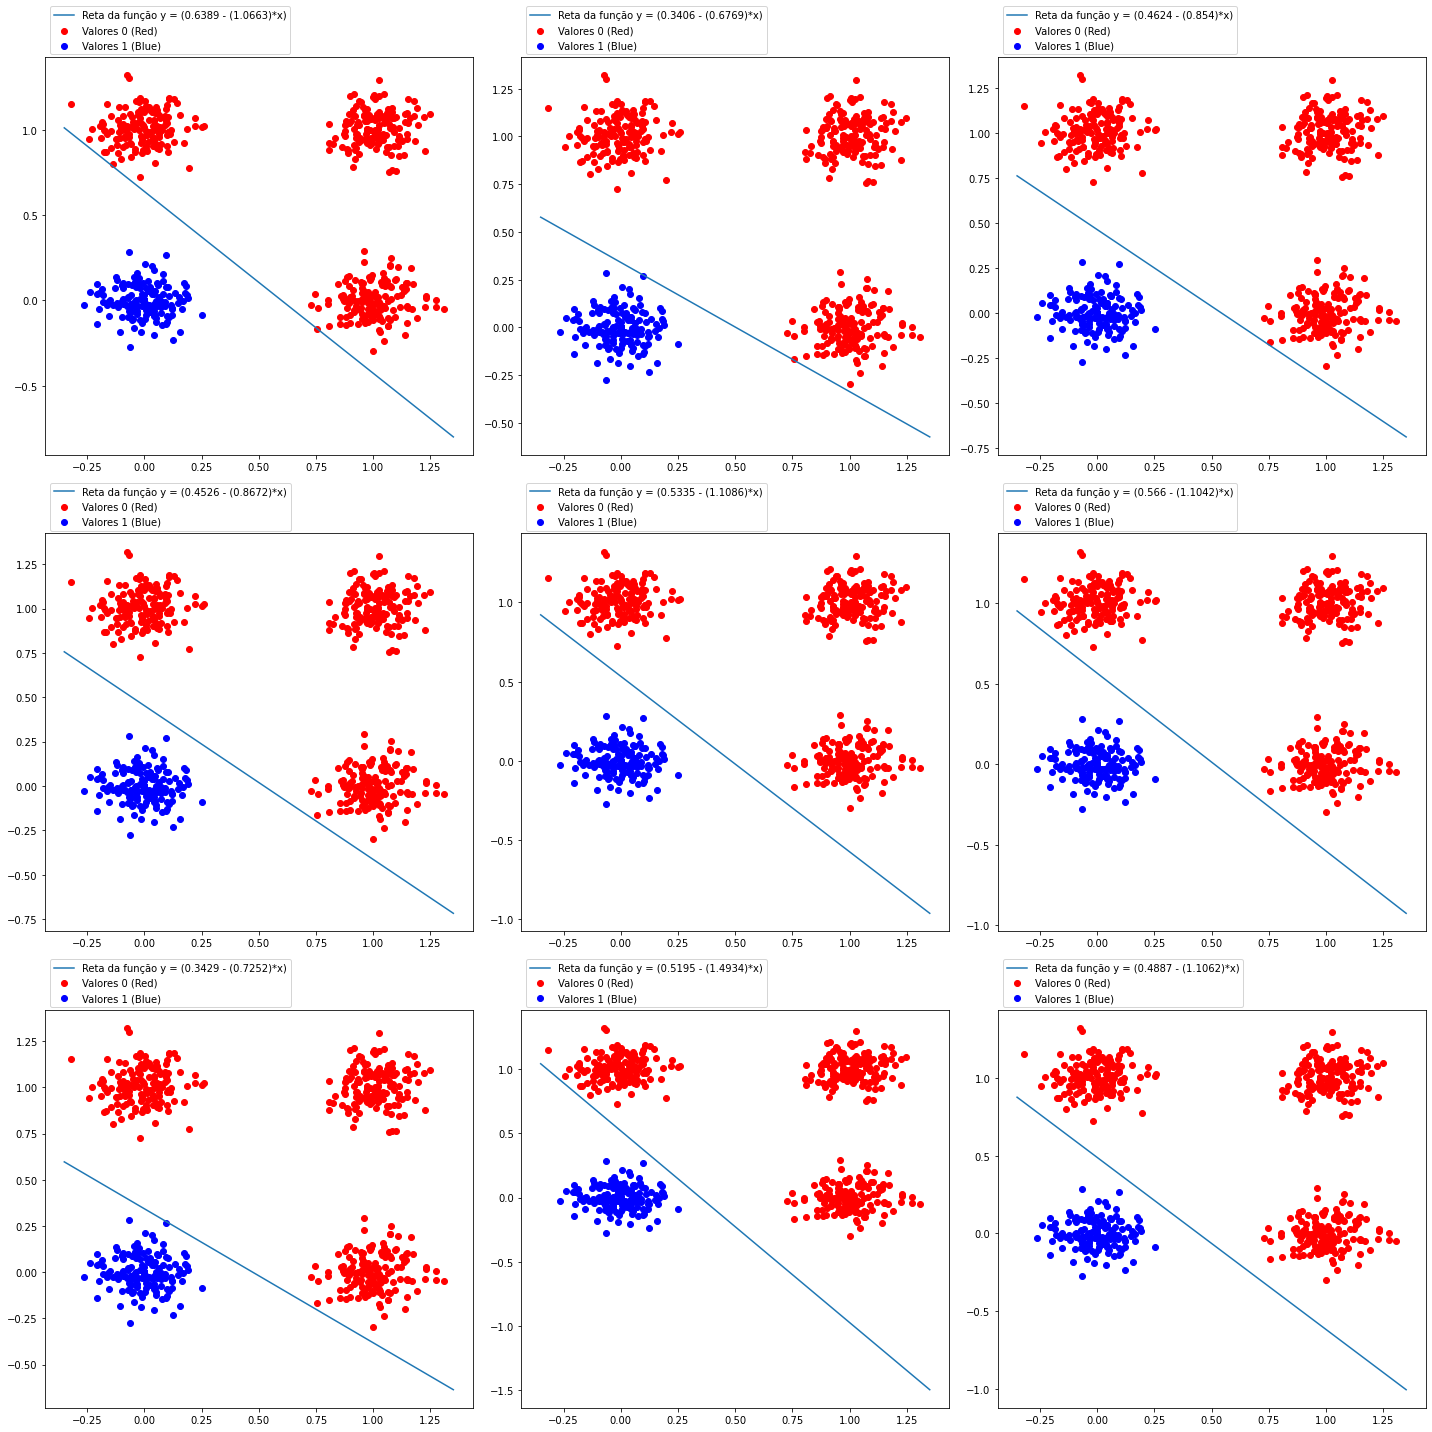

In [31]:
pontosAzul = np.zeros([2, len(vetor_resposta)])                                   # inicializacao do vetor de pontos azuis (valor 1)
pontosVermelho = np.zeros([2, len(vetor_resposta)])                               # inicializacao do vetor de pontos vermelhos (valor 0)

for index in range (len(vetor_resposta)):                                         # loop para dividir a amostra em 2 conjuntos. um para os pontos azuis e outro para os pontos vermelhos
  if vetor_resposta[index] == 0:
    pontosVermelho[0][index] = vetor1[index]
    pontosVermelho[1][index] = vetor2[index]
  else:
    pontosAzul[0][index] = vetor1[index]
    pontosAzul[1][index] = vetor2[index]

for i in range (9):                                                               # loop para exibir os graficos, um para cada configuração
  funcao_a = round(vetor_peso[i][0]/vetor_peso[i][2], 4)
  funcao_b = round(vetor_peso[i][1]/vetor_peso[i][2], 4)

  x = np.linspace(-0.35,1.35)                                                     # pontos do eixo x
  y = funcao_a - funcao_b * x                                                     # funcao da reta que divide a amostra

  plt.tight_layout()                                                              # plot dos graficos e da amaostra
  plt.subplot(3, 3, i+1)
  plt.scatter(pontosVermelho[0], pontosVermelho[1], c="Red", label = "Valores 0 (Red)")
  plt.scatter(pontosAzul[0], pontosAzul[1], c="Blue", label = "Valores 1 (Blue)")
  plt.plot(x, y, label = "Reta da função y = ({} - ({})*x)".format(funcao_a, funcao_b))
  plt.rcParams["figure.figsize"] = (20, 20)
  plt.legend(loc="upper left", bbox_to_anchor=(0, 1.14))

## Calculo da Média e Desvio padrão dos ajustes e épocas
Para se ter uma sensibilidade da distribuição dos dados obtidos após a execução do aprendizado supervisionado acima, é feito um cálculo estatístico da dispersão desse valores ao redor da média deles.
esse valores sao armazenados nas variaveis seguindo a configuração abaixo:
* `ajuste_vetor_medias`: Armazena as médias entre a quantidade de ajustes feitas em uma configuração.
* `ajuste_vetor_desvio_padrao`: Armazena o desvio padrão entre a quantidade de ajustes em uma configuração.
* `epoca_vetor_medias`: Armazena as médias entre a quantidade de épocas feitas em uma configuração.
* `epoca_vetor_desvio_padrao`: Armazena o desvio padrão entre a quantidade de épocas em uma configuração.

In [32]:
# Media e desvio padrao dos ajustes
ajuste_vetor_medias = np.zeros(9)                                                 # inicializacao do vetor de medias de ajustes com 0
ajuste_vetor_desvio_padrao = np.empty(9)                                          # inicializacao do vetor de desvio padrao de ajustes com 0

#Media e desvio padrao da epoca
epoca_vetor_medias = np.empty(9)                                                  # inicializacao do vetor de medias de epocas com 0
epoca_vetor_desvio_padrao = np.empty(9)                                           # inicializacao do vetor de desvio padrao de epocas com 0

for i in range(len(vetor_epoca)):                                                 # loop para calcular as medias e os desvios padrao e armazenar os dados
  ajuste_vetor_medias[i] = np.mean(vetor_mudanca_peso[i])
  ajuste_vetor_desvio_padrao[i] = np.std(vetor_mudanca_peso[i])

  epoca_vetor_medias[i] = np.mean(vetor_epoca[i])
  epoca_vetor_desvio_padrao[i] = np.std(vetor_epoca[i])

## Table de Média e Desvio padrão dos ajustes e épocas

In [33]:
from prettytable import PrettyTable                                               # import da biblioteca de estilizacao da tabela

x = PrettyTable(["Configuração", "Média de épocas", "Desvio de épocas",           # Cria a tabela
                 "Média de ajustes totais", "Desvio de ajustes totais"])

x.padding_width = 1

for i in range(len(epoca_vetor_medias)):                                          # loop para peencher os dados da tabela
  x.add_row([configuracoes[i], 
             round(epoca_vetor_medias[i]), 
             round(epoca_vetor_desvio_padrao[i],4), 
             round(ajuste_vetor_medias[i]), 
             round(ajuste_vetor_desvio_padrao[i],4)])

print(x)

+-----------------+-----------------+------------------+-------------------------+--------------------------+
|   Configuração  | Média de épocas | Desvio de épocas | Média de ajustes totais | Desvio de ajustes totais |
+-----------------+-----------------+------------------+-------------------------+--------------------------+
|   [-40.  40.]   |       35.0      |     26.5161      |          619.0          |         327.7781         |
|   [-10.  10.]   |       11.0      |      5.4153      |          144.0          |         85.3251          |
|    [-1.  1.]    |       6.0       |      2.2234      |           19.0          |         11.5969          |
|   [-0.4  0.4]   |       6.0       |      2.1582      |           14.0          |          6.8958          |
|   [-0.1  0.1]   |       6.0       |      1.9155      |           11.0          |          4.5692          |
|  [-0.01  0.01]  |       5.0       |      0.7574      |           9.0           |          1.4753          |
|   [-0.2 

# Discução sobre a tabela obtida
#### É possivel perceber que para o algoritmo apresentado, e para as configurações obtidas, houve uma certa discrepância entre as diferentes ocasiões de teste (mesmo que todas tenham levado a convergência). Pode-se notar que a configuração: `[-0.005  0.005]` houve a menor media de epocas e ajustes que indicam uma possivel melhor escolha para o treinamento e tambem possui os menores valores para os desvios padrao indicando que os valores testados não se diferem tando assim da media apresentada. No entando sabe-se que para uma amostra linearmente separavel o resultado sempre convirgirá sendo assim equivalentes todos os resutados. Por fim apenas para fins exemplicativos aponta-se a configuração `[-40.  40.]` como sendo a mais "ruim" e a `[-0.005  0.005]` mais "adequada".


# Resultados  
INCREMENTAR AQUI ALGUMA COISA  

# Considerações finais
IMCREMENTAR AQUI ALGUMA COISA